In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os

# Chargement du dataset
df = pd.read_csv("../data/cleaned/donnees_climat_evaporation.csv")
print(f"Données chargées : {df.shape[0]} lignes et {df.shape[1]} colonnes\n")
print(df.head())

Données chargées : 7308 lignes et 18 colonnes

      Station  Annee  Mois  Jour  Pluie  Insolation  TCM=(Tmin+Tmax)/2  \
0  Ouahigouya   2020     1     1    0.0        10.5               23.5   
1  Ouahigouya   2020     1     1    0.0        10.5               23.5   
2  Ouahigouya   2020     1     2    0.0         7.8               21.2   
3  Ouahigouya   2020     1     2    0.0         7.8               21.2   
4  Ouahigouya   2020     1     3    0.0         8.5               19.0   

   TDM= moyenne des valeurs trihoraires  TMAX  TMIN  Humidité relative MAX  \
0                                  23.4  31.0  16.0                     38   
1                                  23.4  31.0  16.0                     38   
2                                  20.5  26.4  15.9                     27   
3                                  20.5  26.4  15.9                     27   
4                                  19.2  25.1  12.9                     26   

   Humidité relative MIN        Date  V

In [27]:
# === Chunk 2 : Préparation des données ===
X = df.drop(columns=['Evap_estimee', 'Date', 'Station'], errors='ignore')
y = df['Evap_estimee']

print("Colonnes utilisées comme features :")
print(list(X.columns))
print(f"Target : Evap_estimee ({len(y)} valeurs)")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"\nDonnées splitées (train/test) :")
print(f" - X_train : {X_train.shape}")
print(f" - X_test  : {X_test.shape}")
print(f" - y_train : {y_train.shape}")
print(f" - y_test  : {y_test.shape}")


Colonnes utilisées comme features :
['Annee', 'Mois', 'Jour', 'Pluie', 'Insolation', 'TCM=(Tmin+Tmax)/2', 'TDM= moyenne des valeurs trihoraires', 'TMAX', 'TMIN', 'Humidité relative MAX', 'Humidité relative MIN', 'Vitesse_moy', 'Pluie_moy_voisine', 'TCM', 'Humidite_moy']
Target : Evap_estimee (7308 valeurs)

Données splitées (train/test) :
 - X_train : (5846, 15)
 - X_test  : (1462, 15)
 - y_train : (5846,)
 - y_test  : (1462,)


In [28]:
# === Chunk 3 : Normalisation ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalisation des données réalisée avec StandardScaler")
print(f"Moyenne sur le train (par feature) : {np.round(np.mean(X_train_scaled, axis=0), 3)}")
print(f"Écart-type sur le train (par feature) : {np.round(np.std(X_train_scaled, axis=0), 3)}")

Normalisation des données réalisée avec StandardScaler
Moyenne sur le train (par feature) : [ 0. -0.  0. -0.  0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0.]
Écart-type sur le train (par feature) : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
# === Chunk 4 : Entraînement du modèle MLP ===
mlp = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
print("Modèle MLP entraîné avec succès.")
print(f"Nombre d'itérations effectuées : {mlp.n_iter_}")
print(f"Loss finale : {mlp.loss_:.6f}")

Modèle MLP entraîné avec succès.
Nombre d'itérations effectuées : 179
Loss finale : 0.001745


In [30]:
# === Chunk 5 : Évaluation du modèle ===
y_pred = mlp.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Évaluation sur le jeu de test :")
print(f" - RMSE : {rmse:.3f}")
print(f" - MAE  : {mae:.3f}")
print(f" - R²   : {r2:.3f}")

# Affichage des 10 premières prédictions vs réelles
df_compare = pd.DataFrame({
    "Valeurs Réelles": y_test.values[:10],
    "Prédictions": y_pred[:10]
})
print("\nComparaison valeurs réelles vs prédictions (10 premiers échantillons) :")
print(df_compare)

Évaluation sur le jeu de test :
 - RMSE : 0.067
 - MAE  : 0.047
 - R²   : 1.000

Comparaison valeurs réelles vs prédictions (10 premiers échantillons) :
   Valeurs Réelles  Prédictions
0           8.2375     8.329409
1          11.2900    11.253234
2          11.2975    11.309123
3           3.9525     3.947724
4           0.0000     0.180210
5          12.4075    12.515314
6          10.5075    10.482006
7           6.4175     6.402329
8          13.8600    13.891055
9           0.0000     0.056009


In [31]:
# === Chunk 6 : Sauvegarde modèle & scaler ===
os.makedirs("../models", exist_ok=True)
joblib.dump(mlp, "../models/modele_ann.joblib")
joblib.dump(scaler, "../models/scaler_ann.joblib")

print("\nModèle sauvegardé dans '../models/modele_ann.joblib'")
print("Scaler sauvegardé dans '../models/scaler_ann.joblib'")


Modèle sauvegardé dans '../models/modele_ann.joblib'
Scaler sauvegardé dans '../models/scaler_ann.joblib'


In [32]:
# === Chunk 7 : Rechargement & test prédiction ===
loaded_model = joblib.load("../models/modele_ann.joblib")
loaded_scaler = joblib.load("../models/scaler_ann.joblib")

X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_scaled_loaded = loaded_scaler.transform(X_test_df)

y_pred_loaded = loaded_model.predict(X_test_scaled_loaded)

print("\nExemple prédiction avec modèle rechargé (5 premiers résultats) :")
print(np.round(y_pred_loaded[:5], 3))


Exemple prédiction avec modèle rechargé (5 premiers résultats) :
[ 8.329 11.253 11.309  3.948  0.18 ]


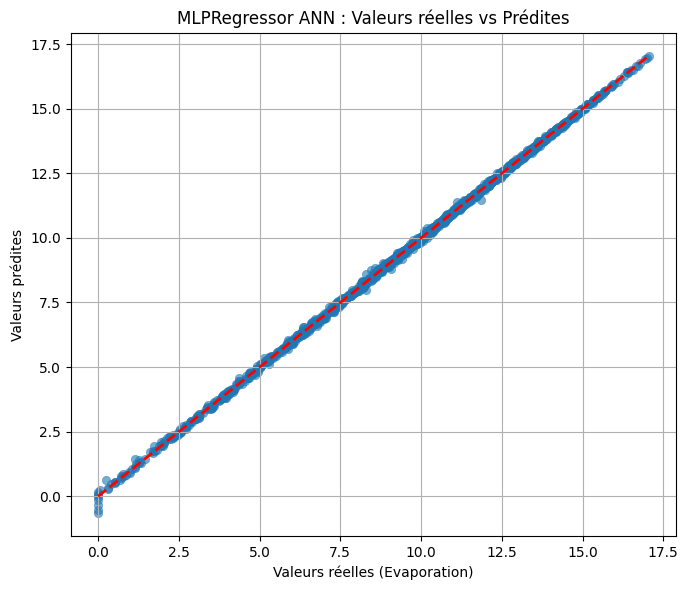

In [33]:
# Visualisation des prédictions vs valeurs réelles
def plot_predictions(y_true, y_pred, model_name="Modèle ANN"):
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, edgecolor=None)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(f"{model_name} : Valeurs réelles vs Prédites")
    plt.xlabel("Valeurs réelles (Evaporation)")
    plt.ylabel("Valeurs prédites")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, y_pred, "MLPRegressor ANN")